### TITANIC DATASET ANALYSIS

In [1]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Read from file 
datafull = pd.read_csv('titanic.csv')

### Basic Dataset details

In [2]:
# Check total number of rows and columns

print("Total Rows:" ,datafull.shape[0])
print("Total Columns:",datafull.shape[1])

print("Column Names:",datafull.columns)

Total Rows: 891
Total Columns: 12
Column Names: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
#Basic Dataset analysis commands

datafull.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [4]:
# Analysing unique values

for i in datafull.columns:
    print("Column Name:",i ,"Number of unique Values:",len(datafull[i].unique()))

Column Name: PassengerId Number of unique Values: 891
Column Name: Survived Number of unique Values: 2
Column Name: Pclass Number of unique Values: 3
Column Name: Name Number of unique Values: 891
Column Name: Sex Number of unique Values: 2
Column Name: Age Number of unique Values: 89
Column Name: SibSp Number of unique Values: 7
Column Name: Parch Number of unique Values: 7
Column Name: Ticket Number of unique Values: 681
Column Name: Fare Number of unique Values: 248
Column Name: Cabin Number of unique Values: 148
Column Name: Embarked Number of unique Values: 4


As we can see above certain columns have unique values as many number of rows ignore those columns

### Removing unnecessary columns from dataset

In [5]:
# How to remove columns from dataset

datafull = datafull.drop(columns=['PassengerId','Ticket','Cabin'])

print("List of columns",datafull.columns)

List of columns Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


### Analysing and removing NA values 

In [6]:
# Checking for Na values in dataset

datafull.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
# For embarked column remove the rows

datafull =datafull.dropna(subset=['Embarked'])


In [8]:
#Verify

datafull.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [9]:
# Dealing with age na values

Age_mean = np.round(datafull['Age'].mean())

print(Age_mean)

30.0


In [10]:
#Substitute values in Age column

datafull.loc[datafull.Age.isnull(),'Age'] = Age_mean

In [11]:
#Check for na values again

datafull.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Na values substituted successfully !

### Graphs

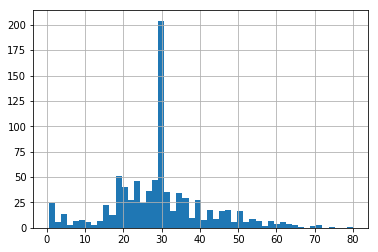

In [12]:
# Plotting some graphs

datafull.Age.hist(bins=50) #histogram

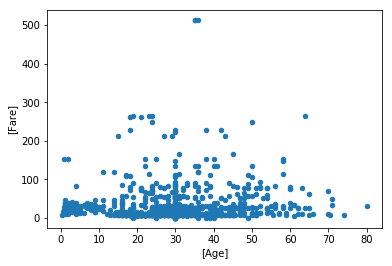

In [13]:
datafull.plot.scatter(x=['Age'],y=['Fare'])

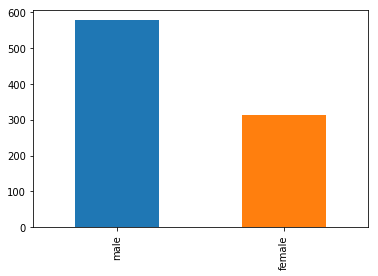

In [14]:
#Categorical variable Bar plot
datafull.Sex.value_counts().plot.bar()

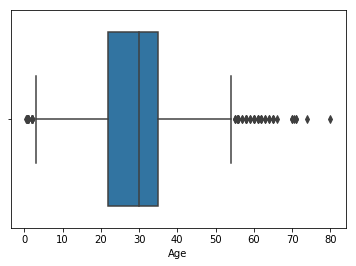

In [15]:
#Boxplot

import seaborn as sns

sns.boxplot(x=datafull['Age'])

### Detecting outliers and removing them

#### Age variable

In [16]:
Q1 = datafull['Age'].quantile(0.25)
Q3 = datafull['Age'].quantile(0.75)
IQR = Q3 - Q1


upper_bound = Q3 + (1.5*IQR)
lower_bound = Q1 - (1.5*IQR)

print(lower_bound,upper_bound)

2.5 54.5


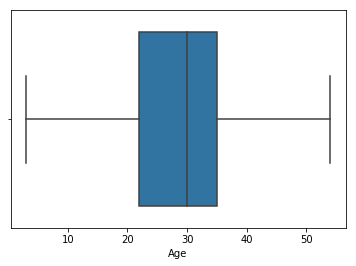

In [17]:
#Assigning values below lower bound to lower bound

datafull.loc[(datafull.Age < lower_bound),'Age'] = np.ceil(lower_bound) # Round reduces 2.5 to 2 which again appears as an outlier

#Assigning values above upper bound to upper bound
datafull.loc[(datafull.Age > upper_bound),'Age'] = np.round(upper_bound)

#Verification
import seaborn as sns

sns.boxplot(x=datafull['Age'])


#### Fare Variable

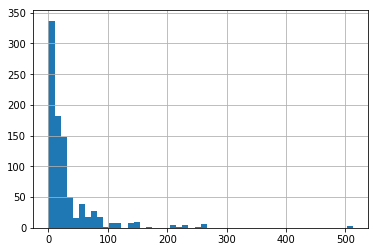

In [21]:
datafull['Fare'].hist(bins=50)

#### Please note that the distribution of Fare is highly skewed ,not at all normal

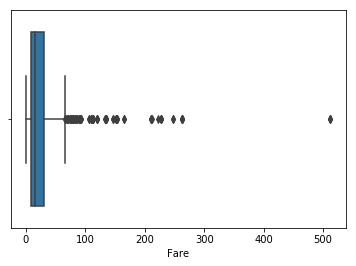

In [18]:
import seaborn as sns

sns.boxplot(x=datafull['Fare'])

In [22]:
Q1 = datafull['Fare'].quantile(0.25)
Q3 = datafull['Fare'].quantile(0.75)
IQR = Q3 - Q1


upper_bound = Q3 + (1.5*IQR)
lower_bound = 0 if Q1 - (1.5*IQR) <0 else Q1 - (1.5*IQR)

print(lower_bound,upper_bound)


0 65.6563


In [23]:
datafull.loc[(datafull.Fare>upper_bound),'Fare'] = upper_bound

In [24]:
datafull.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000
mean     0.382452    2.311586   29.389201    0.524184    0.382452   23.956061
std      0.486260    0.834700   11.967220    1.103705    0.806761   20.414997
min      0.000000    1.000000    3.000000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   30.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   54.000000    8.000000    6.000000   65.656300

#### Note that Fare and Age are normalised

### One Hot Encoding for Categorical Variables

In [25]:
datafull.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked  
0    male  22.0      1      0   7.2500        S  
1  female  38.0      1      0  65.6563        C  
2  female  26.0      0      0   7.9250        S  
3  female  35.0      1      0  53.1000        S  
4    male  35.0      0      0   8.0500        S

#### Need to do one hot encoding for Embarked column and  Sex Column

In [26]:
datafull = pd.get_dummies(datafull,columns=["Sex"])

datafull.head()

Survived  Pclass                                               Name   Age  \
0         0       3                            Braund, Mr. Owen Harris  22.0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2         1       3                             Heikkinen, Miss. Laina  26.0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4         0       3                           Allen, Mr. William Henry  35.0   

   SibSp  Parch     Fare Embarked  Sex_female  Sex_male  
0      1      0   7.2500        S           0         1  
1      1      0  65.6563        C           1         0  
2      0      0   7.9250        S           1         0  
3      1      0  53.1000        S           1         0  
4      0      0   8.0500        S           0         1

In [27]:
datafull = pd.get_dummies(datafull,columns=["Embarked"])

datafull.head()

Survived  Pclass                                               Name   Age  \
0         0       3                            Braund, Mr. Owen Harris  22.0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2         1       3                             Heikkinen, Miss. Laina  26.0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4         0       3                           Allen, Mr. William Henry  35.0   

   SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0      1      0   7.2500           0         1           0           0   
1      1      0  65.6563           1         0           1           0   
2      0      0   7.9250           1         0           0           0   
3      1      0  53.1000           1         0           0           0   
4      0      0   8.0500           0         1           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

In [28]:
#Drop name because it is not important

datafull = datafull.drop(columns=['Name'])

datafull.head()

Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0         0       3  22.0      1      0   7.2500           0         1   
1         1       1  38.0      1      0  65.6563           1         0   
2         1       3  26.0      0      0   7.9250           1         0   
3         1       1  35.0      1      0  53.1000           1         0   
4         0       3  35.0      0      0   8.0500           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

In [29]:
# Now the dataset is ready for train_test splitting

from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(datafull[datafull.columns.difference(['Survived'])],datafull.Survived,test_size=0.3,random_state=123)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
X_train.head()

Age  Embarked_C  Embarked_Q  Embarked_S     Fare  Parch  Pclass  \
591  52.0           1           0           0  65.6563      0       1   
417  18.0           0           0           1  13.0000      2       2   
745  54.0           0           0           1  65.6563      1       1   
513  54.0           1           0           0  59.4000      0       1   
456  54.0           0           0           1  26.5500      0       1   

     Sex_female  Sex_male  SibSp  
591           1         0      1  
417           1         0      0  
745           0         1      1  
513           1         0      1  
456           0         1      0

In [31]:
print("Training Data",X_train.shape[0] ,"rows")

print("Test Data",X_test.shape[0],"rows")

Training Data 622 rows
Test Data 267 rows


### -------------------------------Dataset is now ready to apply ML Algorithms--------------------------------------------------------------

### It is a classification problem . We want to predict survived as yes or no .

---

### Logistic Regression

In [32]:
X_train.head()

Age  Embarked_C  Embarked_Q  Embarked_S     Fare  Parch  Pclass  \
591  52.0           1           0           0  65.6563      0       1   
417  18.0           0           0           1  13.0000      2       2   
745  54.0           0           0           1  65.6563      1       1   
513  54.0           1           0           0  59.4000      0       1   
456  54.0           0           0           1  26.5500      0       1   

     Sex_female  Sex_male  SibSp  
591           1         0      1  
417           1         0      0  
745           0         1      1  
513           1         0      1  
456           0         1      0

In [33]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

logit = LogisticRegression(random_state=123) #By default regularization C=1

logit.fit(X_train,y_train)

pred = logit.predict_proba(X_train)

print("Training Roc-Auc curve",roc_auc_score(y_train,pred[:,1]))

pred2 = logit.predict_proba(X_test)

print("Test Roc-Auc curve",roc_auc_score(y_test,pred2[:,1]))

Training Roc-Auc curve 0.8675764384527271
Test Roc-Auc curve 0.8427282315715457


In [34]:
# Other metrics

pred_train = logit.predict(X_train)
print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,pred_train))
print("Precision:",precision_score(y_train,pred_train))
print("Recall:",recall_score(y_train,pred_train))

print()
pred_test = logit.predict(X_test)
print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,pred_test))
print("Precision:",precision_score(y_test,pred_test))
print("Recall:",recall_score(y_test,pred_test))

Training Metrics
Accuracy: 0.8102893890675241
Precision: 0.7660550458715596
Recall: 0.7136752136752137

Test Metrics
Accuracy: 0.7677902621722846
Precision: 0.7619047619047619
Recall: 0.6037735849056604


<h4> Without Regularization </h4>

In [40]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

logit = LogisticRegression(random_state=123,C=100000,penalty='l1') # Higher the value of C less is the regularization
#Default penalty is L2 changed it to L1

logit.fit(X_train,y_train)

pred = logit.predict_proba(X_train)

print("Training Roc-Auc curve",roc_auc_score(y_train,pred[:,1]))

pred2 = logit.predict_proba(X_test)

print("Test Roc-Auc curve",roc_auc_score(y_test,pred2[:,1]))

Training Roc-Auc curve 0.8678628072957969
Test Roc-Auc curve 0.8432555959217156


In [36]:
# Other metrics

pred_train = logit.predict(X_train)
print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,pred_train))
print("Precision:",precision_score(y_train,pred_train))
print("Recall:",recall_score(y_train,pred_train))

print()
pred_test = logit.predict(X_test)
print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,pred_test))
print("Precision:",precision_score(y_test,pred_test))
print("Recall:",recall_score(y_test,pred_test))

Training Metrics
Accuracy: 0.8118971061093248
Precision: 0.7647058823529411
Recall: 0.7222222222222222

Test Metrics
Accuracy: 0.7715355805243446
Precision: 0.7710843373493976
Recall: 0.6037735849056604


In [37]:
logit.coef_

array([[-0.05272661,  0.81022837,  0.70355994,  0.36233514,  0.01602107,
        -0.10994796, -0.93769007,  2.28617087, -0.41004743, -0.48832976]])

In [39]:
import statsmodels.api as sm

logistic_model =sm.Logit(y_train,X_train).fit()

logistic_model.params

Optimization terminated successfully.
         Current function value: 0.428929
         Iterations 6


Age          -0.052729
Embarked_C    1.560668
Embarked_Q    1.454103
Embarked_S    1.113054
Fare          0.016018
Parch        -0.110096
Pclass       -0.937812
Sex_female    3.411982
Sex_male      0.715844
SibSp        -0.488169
dtype: float64

### Logistic Regression with CrossValidation

In [43]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score

logit_cv = LogisticRegressionCV(cv=10, random_state=0)

logit_cv.fit(X_train,y_train)

pred = logit_cv.predict_proba(X_train)

print("Training roc-Auc Score",roc_auc_score(y_train,pred[:,1]))

pred2 = logit_cv.predict_proba(X_test)

print("Test roc-Auc Score",roc_auc_score(y_test,pred2[:,1]))

Training roc-Auc Score 0.8679729491585161
Test roc-Auc Score 0.8420836751435603


---

### Support Vector Machines

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

svm_model =SVC(random_state=123,probability=True)

svm_model.fit(X_train,y_train)

pred = svm_model.predict_proba(X_train)

print('SVM Train Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred2 = svm_model.predict_proba(X_test)

print('SVM Test Score:{}'.format(roc_auc_score(y_test,pred2[:,1])))

SVM Train Score:0.925389902194026
SVM Test Score:0.7976092816125631


Clear case of overfitting train score is very high as compared to test score

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

svm_model = SVC(random_state=123,probability=True,C=0.001)

svm_model.fit(X_train,y_train)

pred = svm_model.predict_proba(X_train)

print('SVM Train Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred2 = svm_model.predict_proba(X_test)

print('SVM Test Score:{}'.format(roc_auc_score(y_test,pred2[:,1])))


SVM Train Score:0.8868512644285841
SVM Test Score:0.7662018047579985


Setting C parameter does not help

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

svm_model = SVC(random_state=123,probability=True,gamma=0.001)

svm_model.fit(X_train,y_train)

pred = svm_model.predict_proba(X_train)

print('SVM Train Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred2 = svm_model.predict_proba(X_test)

print('SVM Test Score:{}'.format(roc_auc_score(y_test,pred2[:,1])))

SVM Train Score:0.8031875055070932
SVM Test Score:0.7404195476385795


Although overfitting reduced the test scores drop

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

scale =MinMaxScaler()

X_Train_Scale =scale.fit_transform(X_train)
X_Test_Scale = scale.transform(X_test)

svm_model = SVC(random_state=123,probability=True)

svm_model.fit(X_Train_Scale,y_train)

pred =svm_model.predict_proba(X_Train_Scale)

print('Train Score:{}'.format(roc_auc_score(y_train,pred[:,1])))


pred2 =svm_model.predict_proba(X_Test_Scale)

print('Test Score:{}'.format(roc_auc_score(y_test,pred2[:,1])))


Train Score:0.8654176579434311
Test Score:0.8222782139927342


Scaling Clearly helps SVC 

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

scale =MinMaxScaler()

X_Train_Scale =scale.fit_transform(X_train)
X_Test_Scale = scale.transform(X_test)

svm_model = SVC(random_state=123,probability=True,gamma=0.01)

svm_model.fit(X_Train_Scale,y_train)

pred =svm_model.predict_proba(X_Train_Scale)

print('Train Score:{}'.format(roc_auc_score(y_train,pred[:,1])))


pred2 =svm_model.predict_proba(X_Test_Scale)

print('Test Score:{}'.format(roc_auc_score(y_test,pred2[:,1])))

Train Score:0.8647898493259318
Test Score:0.8458338216336576


Scaling as well as setting gamma parameter gave the best test Scores

---

### DECISION TREES

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

dt =DecisionTreeClassifier(random_state=123)

dt.fit(X_train,y_train)

pred_train =dt.predict(X_train)

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,pred_train))
print("Precision:",precision_score(y_train,pred_train))
print("Recall:",recall_score(y_train,pred_train))

print()
pred_test = dt.predict(X_test)
print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,pred_test))
print("Precision:",precision_score(y_test,pred_test))
print("Recall:",recall_score(y_test,pred_test))

Training Metrics
Accuracy: 0.9823151125401929
Precision: 0.9955555555555555
Recall: 0.9572649572649573

Test Metrics
Accuracy: 0.7453183520599251
Precision: 0.6826923076923077
Recall: 0.6698113207547169


Decision Tree is overfitting clearly.

Does Scaling help ?

In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

scale =MinMaxScaler()

X_Train_Scale =scale.fit_transform(X_train)
X_Test_Scale = scale.transform(X_test)

dt =DecisionTreeClassifier(random_state=123)

dt.fit(X_Train_Scale,y_train)

pred_train =dt.predict(X_Train_Scale)

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,pred_train))
print("Precision:",precision_score(y_train,pred_train))
print("Recall:",recall_score(y_train,pred_train))



dt1 =DecisionTreeClassifier(random_state=123)

pred_test =dt.predict(X_Test_Scale)

print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,pred_test))
print("Precision:",precision_score(y_test,pred_test))
print("Recall:",recall_score(y_test,pred_test))


Training Metrics
Accuracy: 0.9823151125401929
Precision: 0.9955555555555555
Recall: 0.9572649572649573
Test Metrics
Accuracy: 0.7453183520599251
Precision: 0.6826923076923077
Recall: 0.6698113207547169


Scaling does not help at all

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

dt =DecisionTreeClassifier(criterion='gini',random_state=123,min_samples_split=20,min_samples_leaf=10)

dt.fit(X_train,y_train)

pred_train =dt.predict(X_train)

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,pred_train))
print("Precision:",precision_score(y_train,pred_train))
print("Recall:",recall_score(y_train,pred_train))

print()
pred_test = dt.predict(X_test)
print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,pred_test))
print("Precision:",precision_score(y_test,pred_test))
print("Recall:",recall_score(y_test,pred_test))

Training Metrics
Accuracy: 0.8488745980707395
Precision: 0.8043478260869565
Recall: 0.7905982905982906

Test Metrics
Accuracy: 0.8014981273408239
Precision: 0.7849462365591398
Recall: 0.6886792452830188


Min samples and min samples leaf parameters help reduces overfitting 

---

### Random Forests

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf  = RandomForestClassifier(n_estimators=200 , random_state=123)
rf.fit(X_train,y_train)
pred = rf.predict_proba(X_train)

print('Training Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred =rf.predict_proba(X_test)

print('Test Score:{}'.format(roc_auc_score(y_test,pred[:,1])))


Training Score:0.9982377301964931
Test Score:0.8520450017578811


Again overfitting 

Try Scaling

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

scale =MinMaxScaler()

X_Train_Scale =scale.fit_transform(X_train)
X_Test_Scale = scale.transform(X_test)

rf  = RandomForestClassifier(n_estimators=5000 , random_state=123)
rf.fit(X_Train_Scale,y_train)
pred = rf.predict_proba(X_Train_Scale)

print('Training Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred =rf.predict_proba(X_Test_Scale)

print('Test Score:{}'.format(roc_auc_score(y_test,pred[:,1])))



Training Score:0.9982267160102212
Test Score:0.854359545294738


Scaling does not helping overfitting in Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

rf  = RandomForestClassifier(n_estimators=20000 , random_state=123, min_samples_leaf=10)
rf.fit(X_train,y_train)
pred = rf.predict_proba(X_train)

print('Training Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred =rf.predict_proba(X_test)

print('Test Score:{}'.format(roc_auc_score(y_test,pred[:,1])))

Training Score:0.909903956295709
Test Score:0.8578167115902965


Min samples in leaf node help to reduce overfitting . But test scores dont improve 

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf  = RandomForestClassifier(n_estimators=2000 , random_state=123, min_samples_leaf=10)
rf.fit(X_train,y_train)
pred = rf.predict_proba(X_train)

print('Training Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred =rf.predict_proba(X_test)

print('Test Score:{}'.format(roc_auc_score(y_test,pred[:,1])))

Training Score:0.9104987223543924
Test Score:0.8584026719793743


---

### Ada Boosting

In [98]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=200 , random_state=123)
adb.fit(X_train,y_train)

pred = adb.predict_proba(X_train)
print('Train Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred = adb.predict_proba(X_test)
print('Test Score:{}'.format(roc_auc_score(y_test,pred[:,1])))

Train Score:0.9299828178694158
Test Score:0.8335872495019337


Overfitting

In [101]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=200 , random_state=123 ,learning_rate=0.1)
adb.fit(X_train,y_train)

pred = adb.predict_proba(X_train)
print('Train Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred = adb.predict_proba(X_test)
print('Test Score:{}'.format(roc_auc_score(y_test,pred[:,1])))

Train Score:0.8923087937263194
Test Score:0.8389487870619945


---

### Gradient Boosting 

In [105]:
from sklearn.ensemble import GradientBoostingClassifier


gb = GradientBoostingClassifier(n_estimators=200 , random_state=123 ,learning_rate=0.01)
gb.fit(X_train,y_train)

pred = gb.predict_proba(X_train)
print('Train Score:{}'.format(roc_auc_score(y_train,pred[:,1])))

pred = gb.predict_proba(X_test)
print('Test Score:{}'.format(roc_auc_score(y_test,pred[:,1])))


Train Score:0.9097662789673099
Test Score:0.8525723661080511


---